In [1]:
import gspread
from google.oauth2.service_account import Credentials
import datetime
import pandas as pd
import numpy as np

In [20]:
credentials_filename = "nodal-wall-416914-5876acf16f70.json"
beo_worksheet_id = 2121169814
kimittud_worksheet_id = 858480548
sheet_id = "1fwhZxPtuP2MSBkTXJRSH-plXGV42mF-HlQPf4KSpFwE"

In [21]:
def initialize_gspread(service_account_file_path: str):
    credentials = Credentials.from_service_account_file(
        service_account_file_path,
        scopes=["https://www.googleapis.com/auth/spreadsheets"],
    )
    return gspread.authorize(credentials)


def google_worksheet_to_df(sheet_id: str, worksheet_id: str | int):
    client = initialize_gspread(credentials_filename)
    sheet = client.open_by_key(sheet_id)
    worksheet = sheet.get_worksheet_by_id(worksheet_id)
    data = worksheet.get_all_values()
    return pd.DataFrame(data[1:], columns=data[0])


def get_beosztas_df():
    return google_worksheet_to_df(sheet_id, beo_worksheet_id)


def get_kimittud_df():
    return google_worksheet_to_df(sheet_id, kimittud_worksheet_id)

In [22]:
beo_df = get_beosztas_df()

In [23]:
beo_df

,Dátum,Esemény / \nMegnevezés,Fizu \n(ha nem hétfő),ÁDÁM,ALEX,BALU,BELLA,BORCSA,BORI,DÁVID,...,SANYI,SÁRI,TAKI,VANDA,VERONKA,BARNUS,Jegyszedő,Kulcs,Aktualizálva\n(Főni),Név
0,Hányszor lenne szívesen/maximum,Jelkulcs:\nj - dolgozott (jm) (főni félkövér)\...,Hétfői bérek:\nJm: r:5000 / h:8500\nPak oda: 2...,3,2,3,2,1,4,,...,,0,4,2,0,,,,,
1,Hány %-on áll?,,,52%,53%,81%,54%,63%,52%,52%,...,47%,46%,52%,47%,68%,,,,,
2,Hányszor volt a félévben dolgozni?,,,4,5,10,3,4,7,6,...,1,1,11,4,0,0,,,,
3,2023.12.04.,JH a Turbinában,-,,,j,,,,,...,,,,,,ov,,,2023.02.01.,Dorina
4,2023.12.09.,Csapatépítő - gyógytornász,13 500 Ft,,,,,,,j,...,,,,,,,,,2023.02.01.,Panka
5,2023.12.11.,JH a Turbinában,-,,,jo,,j,,,...,,,,,,,,,2023.02.01.,Dorina
6,2024.01.08.,JH a Turbinában,-,,jv,,,,,,...,,oj,oj,,,ov,,,2024.01.09.,Dorina
7,2024.01.15.,JH a Turbinában,-,,,,,,,,...,,,oj,jv,,,,Vanda,2024.01.16.,Dorina
8,2024.01.18.,Nix / Váci Greens csapatépítő,13500 Ft + 3000 Ft (koordinátor),,,,,,,,...,,,jk,,,,,,2024.01.31.,Balu
9,2024.01.22.,JH a Turbinában,-,,,oj,,j,,,...,jv,,bj,,o,ov,,Sanyi,Főni: Balu,


In [30]:
def cleanup_beo_df(
    beo_df: pd.DataFrame,
    max_days_past: int = 100,
    day_of_event: datetime = datetime.datetime.today(),
):
    filtered = beo_df.drop(beo_df.columns[[1, 2, -1, -2, -3, -4, -5]], axis=1)
    filtered.drop([0, 1, 2], inplace=True)

    day_of_event = datetime.datetime.today()
    min_date = day_of_event - datetime.timedelta(days=max_days_past)

    filtered["Dátum"] = pd.to_datetime(filtered["Dátum"], format="%Y.%m.%d.")

    filtered = filtered.loc[
        (filtered["Dátum"] > min_date) & (filtered["Dátum"] < day_of_event)
    ]

    filtered["days_before"] = (day_of_event - filtered["Dátum"]).dt.days

    filtered.set_index("Dátum", inplace=True)

    return filtered


cleaned_beo = cleanup_beo_df(beo_df)

In [31]:
cleaned_beo

,ÁDÁM,ALEX,BALU,BELLA,BORCSA,BORI,DÁVID,DORINA,DORKA,EMMA,...,MÁRK,NIKI,PANKA,RÉKA,SANYI,SÁRI,TAKI,VANDA,VERONKA,days_before
Dátum,,,,,,,,,,,,,,,,,,,,,
2024-01-22,,,oj,,j,,,,,,...,,,,,jv,,bj,,o,98
2024-01-29,jv,,,,,j,oj,,,v,...,,,,,v,,oj,,o,91
2024-02-01,,,,,,,,,,j,...,,,,,,,jk,,,88
2024-02-05,,j,,,,,,,,,...,oj,,,,,,oj,jv,o,84
2024-02-15,,,oj,,b,j,,,,,...,bo,,v,jv,,,,,o,74
2024-02-19,,,oj,,,,,,,ve,...,,,,jv,,,,,o,70
2024-02-26,,,,j,,,v,,,,...,o,,,jv,,,oj,j,,63
2024-03-11,jv,,oj,,,jv,,,,,...,,b,,,v,,,,o,49
2024-03-12,,,,,,,ojv,,,,...,,,,,,,oj,,,48


In [22]:
def calc_beo_weight(days_before: int):
    if days_before == 0:
        return 1
    return np.max([0, 1 - 0.5 * np.log(days_before)])

In [28]:
weigths = pd.Series()

for name, values in cleaned_beo.items():
    if values.dtype != np.dtypes.StrDType:
        continue
    weight = cleaned_beo.apply(lambda r: calc_beo_weight(r["days_before"]) if "j" in r[name] else 0, axis=1).sum()
    weigths[name] = weight

weigths

ÁDÁM       0.027045
ALEX       1.027045
BALU       0.000000
BELLA      1.000000
BORCSA     0.000000
BORI       1.333898
DÁVID      1.000000
DORINA     0.000000
DORKA      0.000000
EMMA       0.104120
FANNI      0.027045
GERGŐ      0.000000
JANKA      0.000000
KATA       0.000000
KRISTÓF    0.027045
LILLA      0.438018
MÁRK       0.000000
NIKI       0.306853
PANKA      0.000000
RÉKA       1.306853
SANYI      0.000000
SÁRI       0.000000
TAKI       1.000000
VANDA      0.000000
VERONKA    0.000000
dtype: float64

<Axes: >

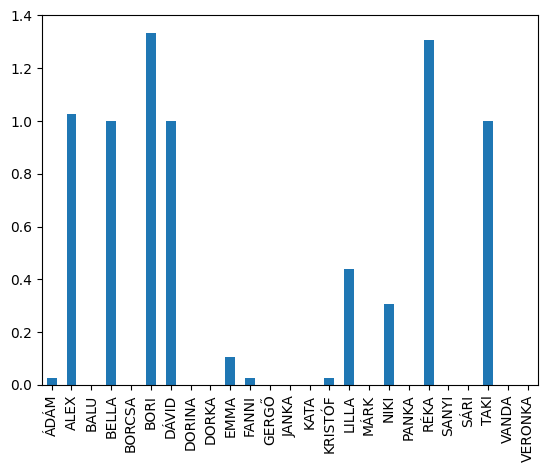

In [29]:
import matplotlib.pyplot as plt

weigths.plot(kind="bar")